#AI기초와활용실습과제 _2020311587_이수현


1, 모듈설치

In [ ]:
import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

2. 데이터로드

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the 'cats_vs_dogs' dataset and retrieve dataset information
data_train, ds_info = tfds.load('cats_vs_dogs', split='train', with_info=True)

# Print dataset information
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteD2FPY8/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp58tcztaytfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-i

3-1, 데이터 확인

In [ ]:
images=[one['image'].numpy() for one in data_train.take(50)]
print(len(images))

50


3-2. 데이터 확인


(-0.5, 499.5, 435.5, -0.5)

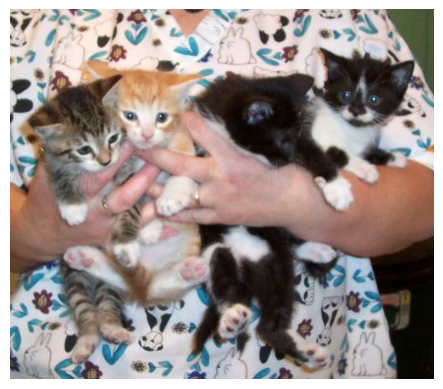

In [ ]:
plt.imshow(images[23])
plt.axis('off')

3. 학습모델 불러오기 (RESNET 50)

In [ ]:
#사전 훈련된 Resnet모델 불러오기
resnet50_pre=tf.keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet')
#모델구조출력
resnet50_pre.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

5, 이미지 구축 예측 함수

In [ ]:
from tensorflow.keras.applications.resnet50 import decode_predictions
from google.colab import files
import cv2
import matplotlib.pyplot as plt

def pred_img(image_input):
    if isinstance(image_input, str):  # 입력이 문자열이면 파일에서 이미지를 불러옴
        img = cv2.imread(image_input)
        if img is None:
            raise ValueError(f"Image not found at {image_input}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:  # 입력이 문자열이 아니면 이미지로 간주
        img = image_input

    plt.imshow(img)
    plt.axis('off')
    plt.show()  # 이미지 보여주기

    if len(img.shape) == 3 and img.shape[2] == 3:
        img_resized = cv2.resize(img, (224, 224))
    elif len(img.shape) == 2:
        img_resized = cv2.resize(img, (224, 224))
    else:
        raise ValueError("Invalid image format")

    # 예측 모델을 로드하고 이미지 예측 수행
    from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

    resnet50_pre = ResNet50(weights='imagenet')
    img_resized = preprocess_input(img_resized)
    pred = resnet50_pre.predict(img_resized.reshape([1, 224, 224, 3]))
    decoded_pred = decode_predictions(pred)

    for i, instance in enumerate(decoded_pred[0]):
        print(f"{i + 1}위: {instance[1]} ({instance[2] * 100:.2f}%)")



6;결과출력

Saving 다코.jpg to 다코.jpg


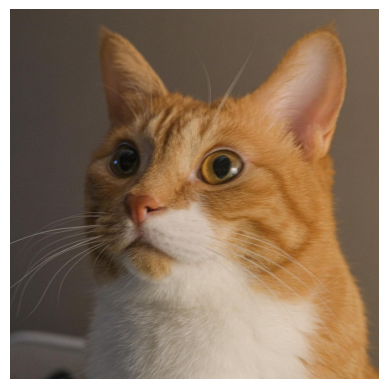

1/1 [==============================] - 2s 2s/step
1위: tiger_cat (65.34%)
2위: tabby (16.68%)
3위: Egyptian_cat (11.76%)
4위: lynx (0.85%)
5위: Siamese_cat (0.49%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)

Saving 화면 캡처 2023-10-05 183832.jpg to 화면 캡처 2023-10-05 183832.jpg


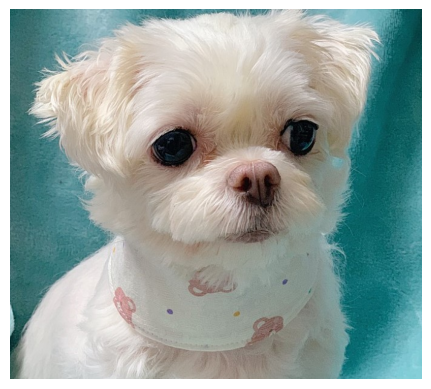

35363/35363 [==============================] - 0s 0us/step
1위: Maltese_dog (50.28%)
2위: Shih-Tzu (24.08%)
3위: Pekinese (4.27%)
4위: Japanese_spaniel (3.38%)
5위: teddy (2.50%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)


Saving KakaoTalk_20231005_184553919.jpg to KakaoTalk_20231005_184553919.jpg


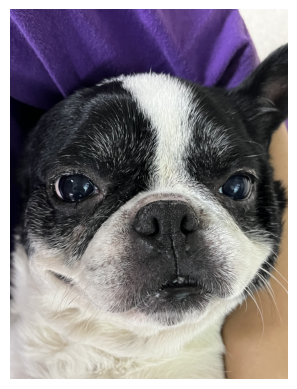

1/1 [==============================] - 1s 1s/step
1위: Boston_bull (97.54%)
2위: French_bulldog (2.03%)
3위: pug (0.14%)
4위: toy_terrier (0.12%)
5위: Chihuahua (0.05%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)

Saving 다몽.jpg to 다몽.jpg


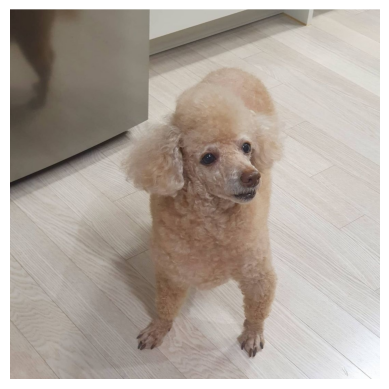

1/1 [==============================] - 1s 1s/step
1위: miniature_poodle (69.60%)
2위: toy_poodle (29.77%)
3위: standard_poodle (0.54%)
4위: cocker_spaniel (0.03%)
5위: Chihuahua (0.01%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)

Saving 수현.jpg to 수현.jpg


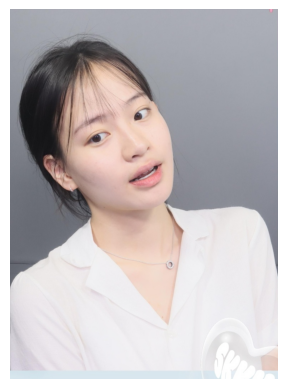

1/1 [==============================] - 1s 1s/step
1위: notebook (15.26%)
2위: syringe (5.77%)
3위: lab_coat (5.17%)
4위: kimono (3.52%)
5위: maraca (3.15%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)

Saving KakaoTalk_20231005_201919208.jpg to KakaoTalk_20231005_201919208 (1).jpg


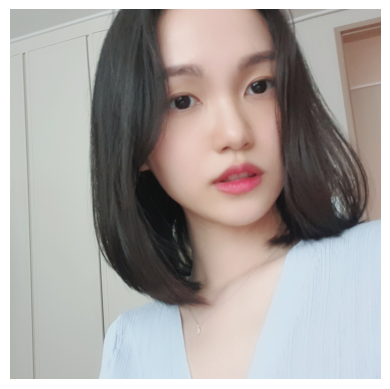

1/1 [==============================] - 1s 1s/step
1위: wig (56.41%)
2위: stole (11.69%)
3위: cardigan (5.57%)
4위: lipstick (2.39%)
5위: wool (1.79%)


In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    image_path=filename #업로드 된 파일의 이름 가져오기

    pred_img(image_path)